<img src="logo-text.png"/>


### Southhampton Python User Group May 2015

**Jens Hedegaard Nielsen** | jenshnielsen@gmail.com jens.nielsen@ucl.ac.uk | UCL

Core Matplotlib contributor

This notebook requires matplotlib 2.x development branch

Part of the content is borrowed from A talk given at PyData New York by Thomas Caswell
and Michael Droettboom

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import YouTubeVideo

/Users/jhn/Envs/mpl2x/lib/python3.5/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/jhn/Envs/mpl2x/lib/python3.5/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Backgound

* Matplotlib is long lived project, originally funded by John Hunter

* Oldest surviving commit in the repository from 2003.

* The code has grown a lot sometimes rather organically since then.

* Some of the design choises made 10+ years ago may seem a bit out of date today.

* We decided to make a 2.0 release modernise the visual style.

* Important not to continuously change the visual style. 

* A plot made with 1.1 should look as close as possible to a plot made with 1.5.

* So changing the style in one big 2.0 release.

# matplotlib is alive and well

- Officially a NumFocus project
- More developer resources available

### Other stats

- matplotlib.org
  - 470k sessions/month
  - 1.4m page views/month
  - google thinks 190k users/month
  - cute patterns in time
- github
  - 40k views/month
  - 14k users/month
  - 1.3k unique cloners/month
  - 1.3k forks
- source forge
  - 60-120k monthly downloads (39-55% windows)
  - 2M total downloads in last 2 years
  - spikes of 100k/month around releases
- pypi
  - 190k/month
- Debian popcon
  - 93rd percentile in popularity among all Debian packages
- Other
  - Doesn't include Cristoph Gohlke, Enthought Canopy, Continuum Anaconda, other Linux and Mac packaging

## Release Schedule

- May, 2016: Version 1.5.2 bug fix relase
- May, 2016: first beta of Version 2.0: Style changes "only" relase to follow
- September, 2016: Version 2.1: Regular feature release, Traitlets, Widgets version of notebook backend.

# Matplotlib styles

 - partially update rcparams (default values)
 - Developed by Tony Yu 
 - Since Matplotlib 1.4

In [4]:
import matplotlib.style as ms
ms.available

['seaborn-colorblind',
 'seaborn-darkgrid',
 'ggplot',
 'seaborn-notebook',
 'seaborn-dark',
 'grayscale',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-poster',
 'seaborn-ticks',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'seaborn-dark-palette',
 'classic',
 'transparent_background',
 'dark_background',
 'seaborn-paper',
 'seaborn-deep',
 'bmh',
 'seaborn-talk',
 'seaborn-muted',
 'seaborn-white']

<IPython.core.display.Javascript object>


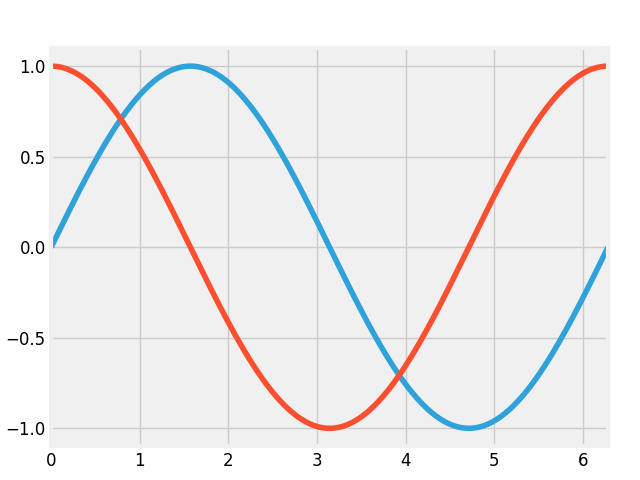

In [5]:
th = np.linspace(0, 2*np.pi, 1024)

with ms.context('fivethirtyeight'):
    fig, ax = plt.subplots()
    ln_sin, = ax.plot(th, np.sin(th))
    ln_cos, = ax.plot(th, np.cos(th))
    ax.set_xlim(0, 2*np.pi)

<IPython.core.display.Javascript object>


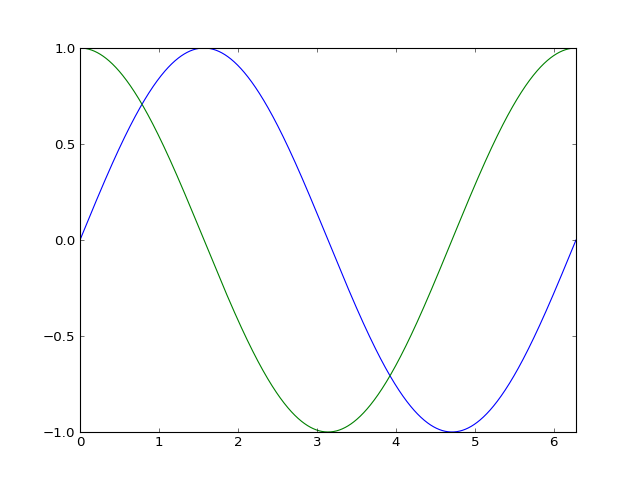

In [6]:
th = np.linspace(0, 2*np.pi, 1024)

with ms.context('classic'):
    fig, ax = plt.subplots()
    ln_sin, = ax.plot(th, np.sin(th))
    ln_cos, = ax.plot(th, np.cos(th))
    ax.set_xlim(0, 2*np.pi)

<IPython.core.display.Javascript object>


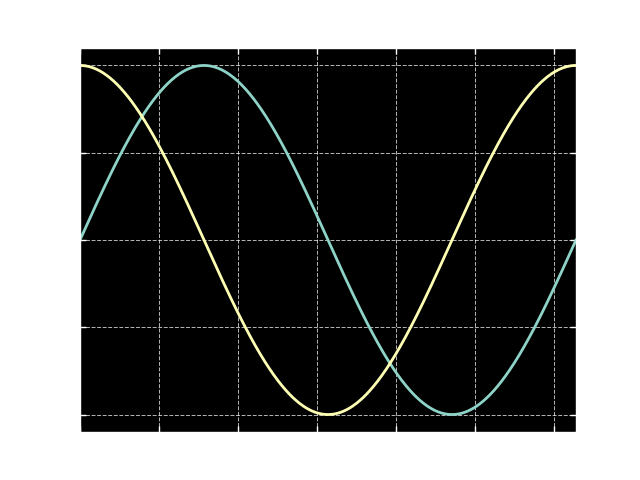

In [90]:
th = np.linspace(0, 2*np.pi, 1024)

with ms.context('bmh'), ms.context('dark_background'):
    fig, ax = plt.subplots()
    ln_sin, = ax.plot(th, np.sin(th))
    ln_cos, = ax.plot(th, np.cos(th))
    ax.set_xlim(0, 2*np.pi)

# Matplotlib style changes

It has been known for a long time that Rainbow colormaps are problematic i.e. [Rainbow Color Map (Still) Considered Harmful](http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=4118486&tag=1)(2007)

The default matplotlib colormap so far has been `Jet` inspired by Matlab.

<IPython.core.display.Javascript object>


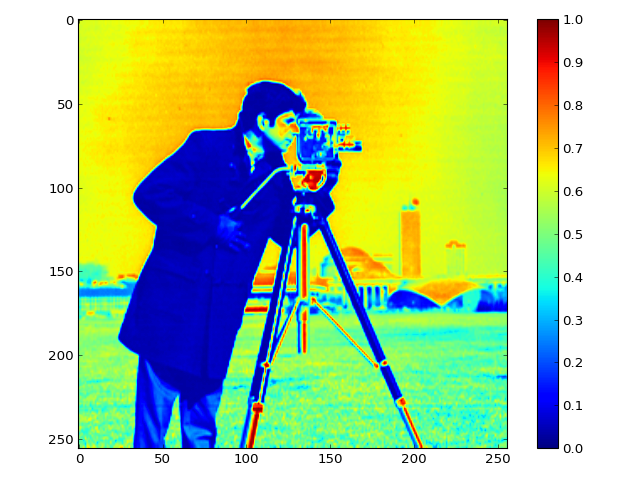

In [71]:
from skimage import data
from skimage import color
from skimage import img_as_float
grayscale_image = img_as_float(data.camera()[::2, ::2])
with matplotlib.style.context('classic'):
    fig, ax = plt.subplots(1,1)
    im = ax.imshow(grayscale_image)
    fig.colorbar(im)
    fig.tight_layout()

Probably favoured because they are "colorfull and shiny"

Lots of issues:

* Difficult to judge distance between colors
* Creates artificial bands in the image
* Not good in black and white print
* Problematic for colour blind users

<IPython.core.display.Javascript object>


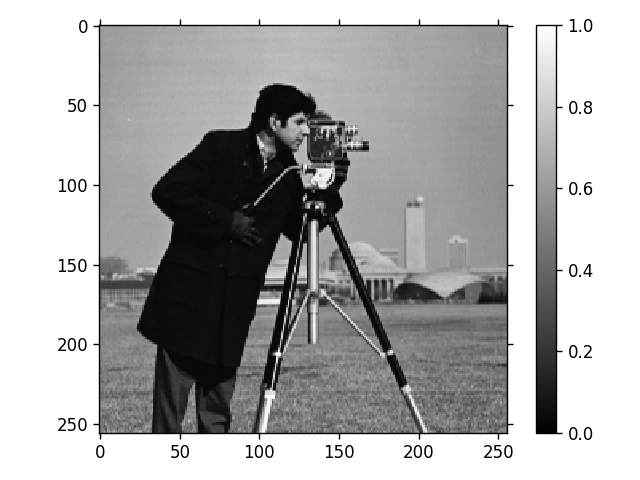

In [70]:
fig, ax = plt.subplots(1,1)
im = ax.imshow(grayscale_image, cmap='gray')
fig.colorbar(im)
fig.tight_layout()

An issue was created on the Matplotlib issue tracker in 2012 suggesting to replace Jet with something else: [Replace "jet" as the default colormap](https://github.com/matplotlib/matplotlib/issues/875)

## The question is with what:

None of the other bundled Matplotlib colormaps were obviously great. Endless bikeshedding

In 2015 Nathaniel Smith and Stéfan van der Walt designed 3 new proposed colourmaps.

<img src='lightness_00.png'>

A lot of work went into designing these colormaps to be perceptually uniform. 
Including lots of colour theory.


The fundamental constraints for designing a good colourmap are:

* Sequential.
* Colourfull and pretty.
* Perceptually uniform.
* Work well in black and white.
* Colorblind friendly.

This reduces to options to 2 basic types of colormaps:

* Dark blue to bright yellow via red.
* Dark blue to bright yellow via green.

Nathaniel and Stéfan suggested 3 red colormaps.

* Inferno
* Plasma
* Magma

And put a vote up on the Matplotlib user mailing list.

No clear favourit among the 3.

Eric Firing suggested a 4th green colormap `Viridis`

Overwhelmingly more popular than the red colormaps.

<IPython.core.display.Javascript object>


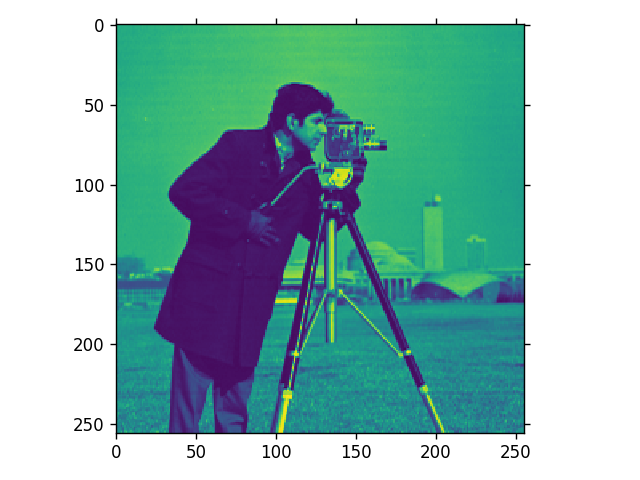

In [57]:
fig, ax = plt.subplots(1,1)
ax.imshow(grayscale_image)
fig.tight_layout()

To make handling colormaps easier they designed a tool (Viscm) to visualise and edit colormaps.

For more info on colormaps see Nathanials talk from Scipy 2015 the [Choosing Colormaps](http://matplotlib.org/devdocs/users/colormaps.html?highlight=color) section of the Matplotlib documentation.

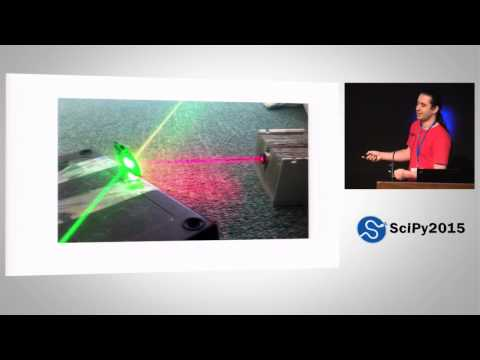

In [75]:
YouTubeVideo('xAoljeRJ3lU')

# Default changes

Take this as a opotunity to change more defaults in the style.

Following Scipy 2015 the Matplotlib project had a call for suggestions to new defaults.

Intial idea was a new release matching Matplotlib 1.5 with no code changes.

As it turned out this was not quite as simple:

## Image interpolation

First Matplotlib plot in Software Carpentry [Python Novice lecture 1](http://swcarpentry.github.io/python-novice-inflammation/01-numpy.html)

<img src="01-numpy_71_0.png"/>

As an introduction to Matplotlib this makes me sad:
* Jet colormap (see above)
* "Fuzzy" due to interpolation

All in all a rather terrible plot.

* Colormap already fixed
* Default interpolation changed to `nearest`

<IPython.core.display.Javascript object>


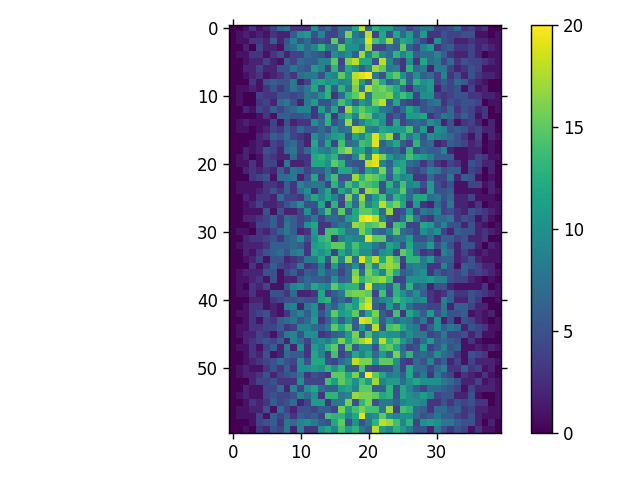

In [77]:
data = np.loadtxt(fname='inflammation-01.csv', delimiter=',')
plt.imshow(data)
plt.colorbar()
plt.tight_layout()

## However, what happens if you make a new plot with Viridis and different interpolations?

<img src='old_image_interpolation.png'>

## Viridis contains blue, green and yellow colors so where does that red come from?

* Existing code does colourmapping followed by interpolation.
* Not obvious with a colourmap such as `Jet` containing all colours.
* Changed code to do interpolation followed by colourmapping.
* More or less complete rewrite of image infrastructure.
* Fixed a large number of old image bugs in the process.

# New default color cycle for line plots

Color cycle used to be:
* Blue (B)
* Green (G)
* Red (R)
* Black (K)
* Cyan (C)
* Magenta (M)
* Yellow (Y)

Probably selected because they are base colors on screen and in print.

<IPython.core.display.Javascript object>


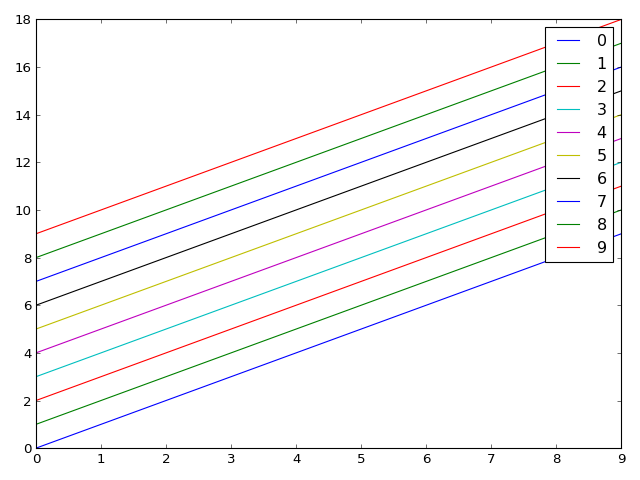

In [18]:
with matplotlib.style.context('classic'):
    x = np.arange(10)
    fig, ax = plt.subplots(1,1)
    for i in range(10):
        y = x + i
        ax.plot(x, y, label=str(i))
    ax.legend()
fig.tight_layout()

Not particularly aesthetically pleasing colours.

## New defaults based on Vega [category10](https://github.com/vega/vega/wiki/Scales#scale-range-literals)

<IPython.core.display.Javascript object>


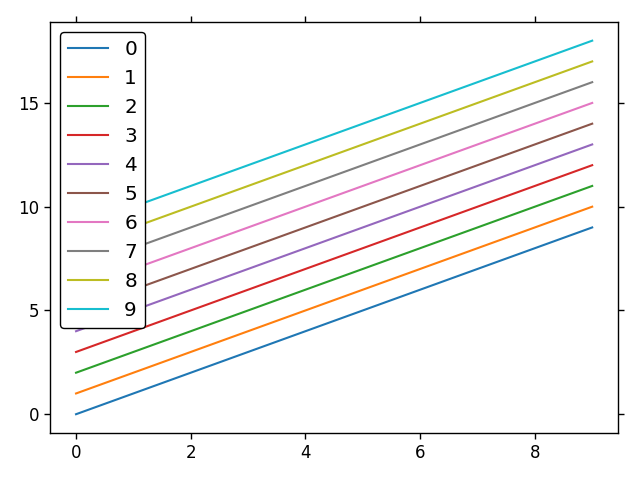

In [7]:
x = np.arange(10)
fig, ax = plt.subplots(1,1)
for i in range(10):
    y = x + i
    ax.plot(x, y, label=str(i))
ax.legend()
fig.tight_layout()

Still need to decide on a new legend style see Github PR: [Legend default style change: smaller, no border](https://github.com/matplotlib/matplotlib/pull/6424)

## What if you need to use a specific colour in the cycle?
In the old days default colours are easy to type since default colours all have one letter names.

<IPython.core.display.Javascript object>


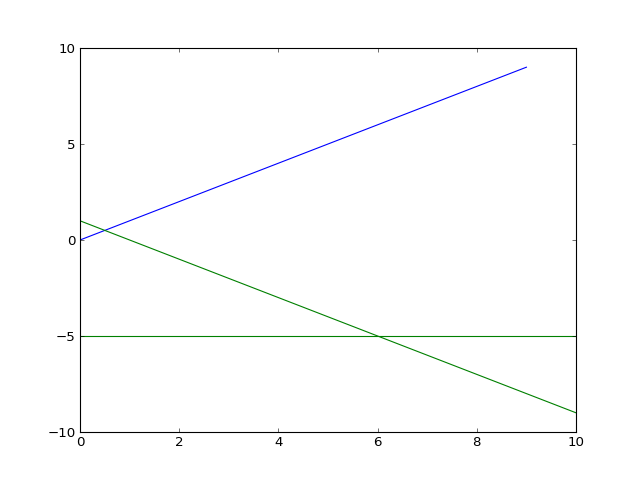

In [39]:
with matplotlib.style.context('classic'):
    fig, ax = plt.subplots(1,1)
    ax.plot(range(10))
    ax.plot(range(1,-10,-1))
    ax.axhline(-5, color='g')

However the new default colours have values such as #ff7f0e

Not easy to remember or type!

Solution. In the new syntax the default colours in n'th colour in the cycle can be accessed as
`Cn`

<IPython.core.display.Javascript object>


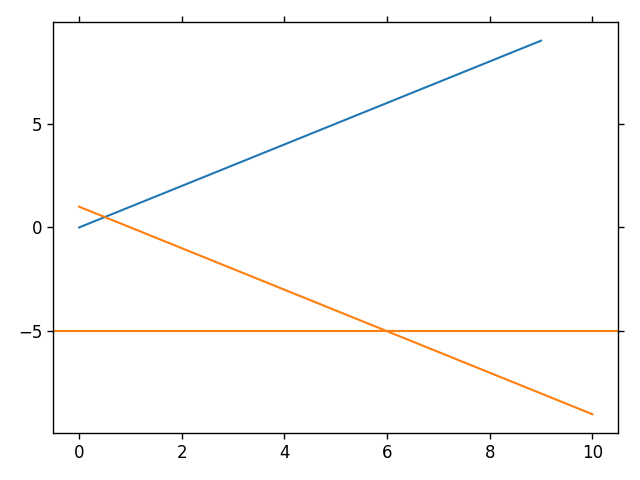

In [86]:
fig, ax = plt.subplots(1,1)
ax.plot(range(10))
ax.plot(range(1,-10,-1))
ax.axhline(-5,-4, color='C1')
fig.tight_layout()

# Cycler

Easily cycle style all kinds of parameters.

<IPython.core.display.Javascript object>


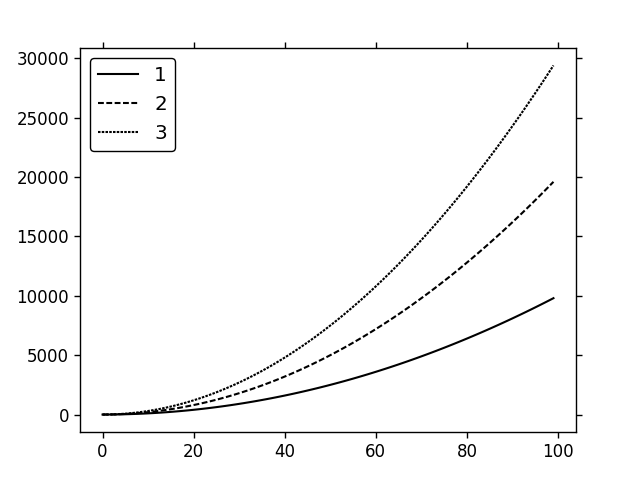

In [118]:
import cycler

fig, ax = plt.subplots(1,1)
mycycle = cycler.cycler('color', 'K') * cycler.cycler('ls', ['-', '--', ':'])
ax.set_prop_cycle(mycycle)
x = np.arange(100)
ax.plot(x ** 2 * 1, label='1')
ax.plot(x ** 2 * 2, label='2')
ax.plot(x ** 2 * 3, label='3')
ax.legend()

<IPython.core.display.Javascript object>


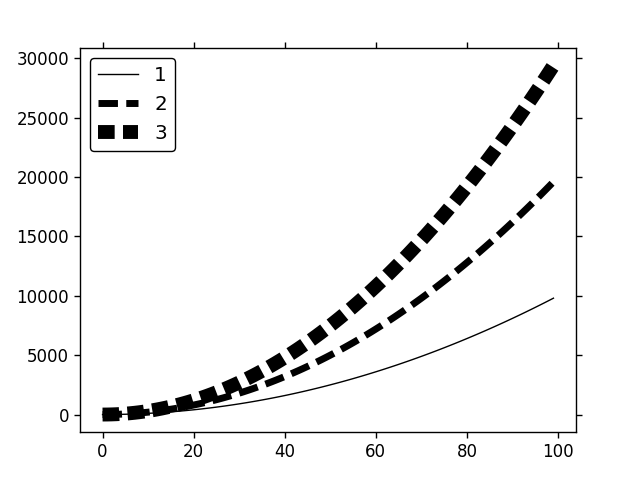

In [131]:
import cycler

fig, ax = plt.subplots(1,1)
mycycle = cycler.cycler('lw', [1,5,10]) + cycler.cycler('ls', ['-', '--', ':'])
ax.set_prop_cycle(mycycle)
x = np.arange(100)
for i in range(1,4):
    ax.plot(x ** 2 * i, label=str(i))
ax.legend()

<IPython.core.display.Javascript object>


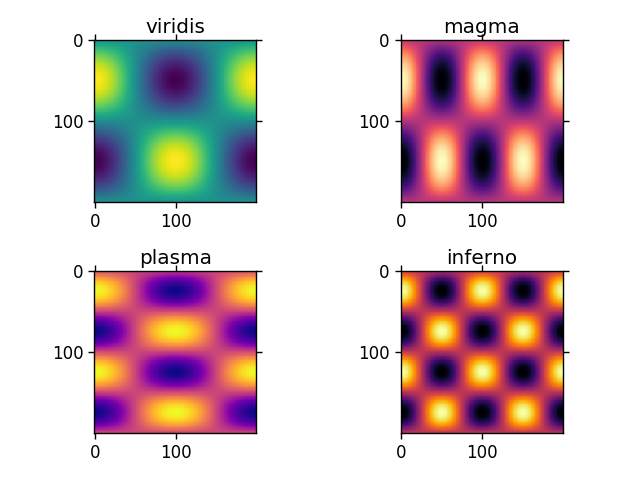

In [8]:
from cycler import cycler

cmap = cycler('cmap', ['viridis', 'magma','plasma', 'inferno'])
x_mode = cycler('x', [1, 2])
y_mode = cycler('y', x_mode)

def demo(ax, x, y, cmap):
    X, Y = np.ogrid[0:2*np.pi:200j, 0:2*np.pi:200j]
    data = np.sin(X*x) * np.cos(Y*y)
    ax.imshow(data, cmap=cmap)
    ax.set_title(cmap)
    
cy = (x_mode * y_mode) + cmap 


fig, axes = plt.subplots(2, 2)
for ax, sty in zip(axes.ravel(), cy):
    demo(ax, **sty)
fig.tight_layout()

# More examples

Documentation build automatically from the master branch.
Build from master branch but very similar to 2.x
* [Matplotlib devdocs](http://matplotlib.org/devdocs)
* [Matplotlib gallery](http://matplotlib.org/devdocs/gallery.html)
* [Matplotlib examples](http://matplotlib.org/devdocs/examples/index.html)

# DEMOS

All working with 2.x

## Labeled data support

In [138]:
import pandas as pd

In [140]:
autos = pd.read_csv('auto-mpg.csv')
autos

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


<IPython.core.display.Javascript object>


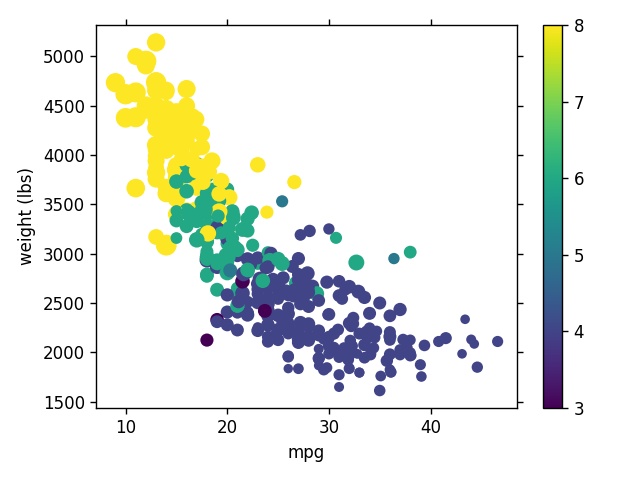

In [142]:
fig, ax = plt.subplots()
sc = ax.scatter('mpg', 'weight', 'hp', 'cyl', data=autos)
plt.colorbar(sc)
ax.set_ylabel('weight (lbs)')
ax.set_xlabel('mpg')
fig.tight_layout()

## Easy faceting

<IPython.core.display.Javascript object>


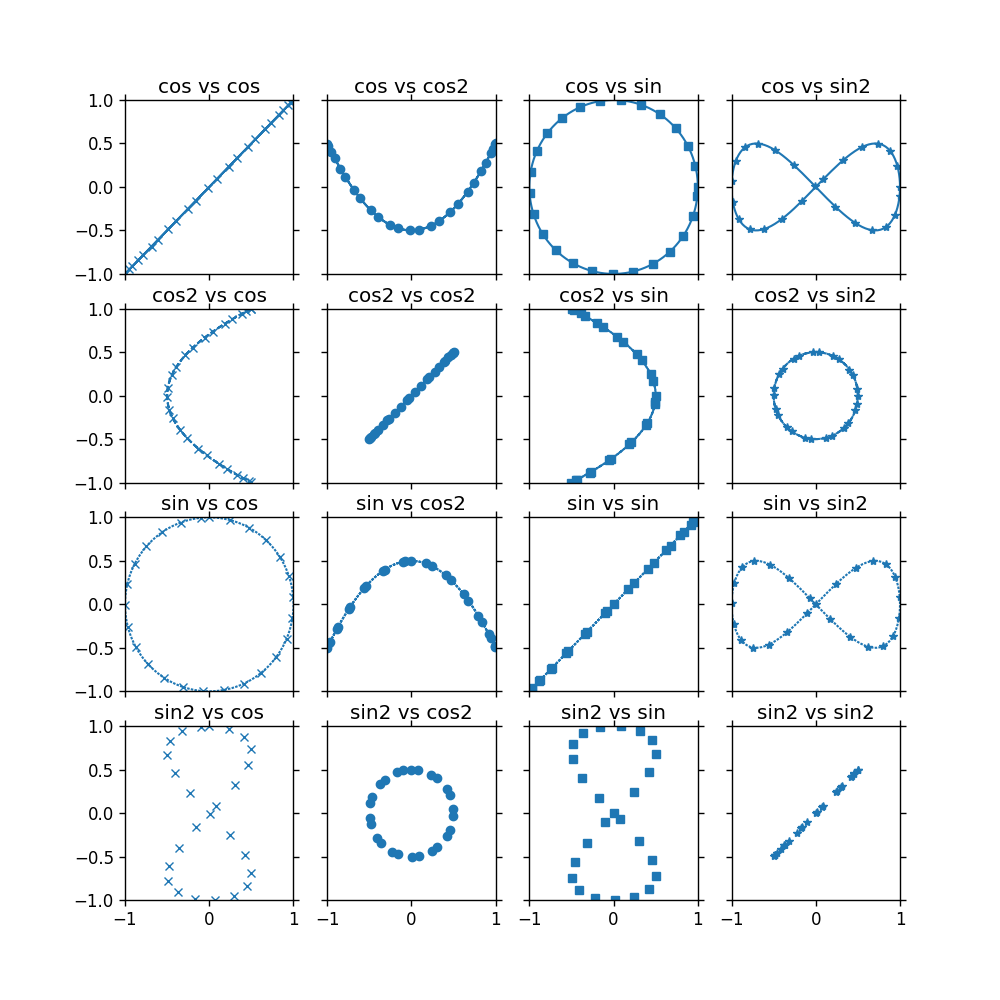

In [15]:

from cycler import cycler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def simple_plot(ax, x, y, **kwargs):
    return ax.plot(x, y, **kwargs)

th = np.linspace(0, 2*np.pi, 128)
df = pd.DataFrame({'sin': np.sin(th), 'cos': np.cos(th),
                   'sin2': .5 * np.sin(2 * th), 'cos2': .5 * np.cos(2 * th)})

def easy_facet(df, cycle1, cycle2):
    cycleX = (cycler('x', df.keys()) + cycle1)
    cycleY = (cycler('y', df.keys()) + cycle2) 
    kw_cycle = cycleX * cycleY

    fig, axes = plt.subplots(len(df.keys()), len(df.keys()), sharex=True, sharey=True,
                             figsize=(10, 10))
    lines = []
    axes[0, 0].set_xlim([-1, 1])
    axes[0, 0].set_ylim([-1, 1])
    for ax, kwargs in zip(axes.ravel(), kw_cycle):
        
        ln, = simple_plot(ax, markevery=5, data=df, **kwargs)
        ax.set_title('{x} vs {y}'.format(**kwargs))
        lines.append(ln)
        
    return lines


arts = easy_facet(df, cycler('linestyle', ['-', '--', ':', '']), cycler('marker', 'xos*'))

### Place in community

 - we really are low on resources, but that's improving
 - always looking for new contributors 
 - usage now well outside domain knowledge of core-devs
  - looking for domain experts to develop specialized plotting tools
  - happy to host projects built on top of mpl under matplotlib.org organization
 - we are a substrate for domain-specific plotting (seaborn, pandas, glueviz, holoviews etc)

## Thank you

  - John Hunter

Lots of work in the above by

* Thomas Caswell
* Michael Droettboom
* Eric Firing
* Ben Root

and many more:

In [144]:
import textwrap
commits = pd.read_csv('commits_time_author.csv', sep='&')
commiters = Counter(commits['name'])
print('\n'.join(textwrap.wrap(', '.join(sorted([n.split('<')[0].rstrip() for n in commiters.keys()])))))

Acanthostega, Adam Ginsburg, Adam Heck, Adrian Price-Whelan, Alan Du,
Alejandro Dubrovsky, Alex Loew, Alexander Taylor, Alexei Colin, Ali
Mehdi, Alistair Muldal, Allan Haldane, AmyTeegarden, Andrea Bedini,
Andreas Wallner, Andrew Dawson, Andrew Merrill, Andy Zhu, Anton
Akhmerov, Antony Lee, Arie, Ariel Hernán Curiale, Arnaud Gardelein,
Arpad Horvath, Aseem Bansal, Behram Mistree, Ben Cohen, Ben Gamari,
Ben Keller, Ben Root, Benjamin Reedlunn, Binglin Chang, Bradley M.
Froehle, Brandon Liu, Brett Cannon, Brian Mattern, Brian McLaughlin,
Bruno Beltran, CJ Carey, Cameron Bates, Cameron Davidson-Pilon,
Carissa Brittain, Carwyn Pelley, Casey Webster, Casper van der Wel,
Chris Beaumont, Chris G, Christian Brueffer, Christoph Gohlke,
Christoph Hoffmann, Cimarron Mittelsteadt, Damon McDougall,
Danhickstein, Daniel Hyams, Daniel O'Connor, Dara Adib, David, David
Anderson, David Haberthür, David Kua, David Trémouilles, Dean
Malmgren, Dmitry Lupyan, DonaldSeo, Dora Fraeman, Duncan Macleod,
Elena